# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key

from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude (Python library)
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
#pip install citipy

     |████████████████████████████████| 557 kB 4.0 MB/s eta 0:00:01
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559700 sha256=5510be2b79a2e6268607129c7d18482b488b45b8ddb522cb8ddbc8b8c1130f5c
  Stored in directory: /Users/noreenjordan/Library/Caches/pip/wheels/d9/dd/68/8cc0be16282b0fcae5acb7280b47d31952f203c401923a8c1e
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
# Get weather data and check out the necessry keywords for the queries
response = requests.get(query_url + city).json()

print(f"The weather API responded with: {response}.")

The weather API responded with: {'coord': {'lon': -134.9692, 'lat': -23.1203}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.53, 'feels_like': 79.56, 'temp_min': 78.53, 'temp_max': 78.53, 'pressure': 1020, 'humidity': 74, 'sea_level': 1020, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 17.27, 'deg': 97, 'gust': 19.46}, 'clouds': {'all': 87}, 'dt': 1643341799, 'sys': {'country': 'PF', 'sunrise': 1643294166, 'sunset': 1643341741}, 'timezone': -32400, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}.


In [19]:
# Build a list 

citylist = []
lat = []
lon = []
temp = []
humidity = []
clouds = []
wind_rate = []
country = []
date = []

count = 1


for city in cities:
    if count < 11:
        try:
            response = requests.get(query_url + city).json()
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            clouds.append(response['clouds']['all'])
            wind_rate.append(response['wind']['speed'])
            country.append(response["sys"]["country"])
            date.append(response['dt'])
            citylist.append(city)
            print(f"Processing city: {city}")
        except:
            print(f"City NOT found. Skip {city}")
        count+=1
print(f"Data Retrieval Complete")
        #If count = 50:
            #time.sleep(60)
            #count = 0
        
        
        #HINT: The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using time.sleep(60) after each set of 50 cities to avoid API errors due to large calls.
        # Add a one second interval between queries to stay within API query limits
    
    

    

Processing city: carbonear
Processing city: mbekenyera
City NOT found. Skip taolanaro
Processing city: porto velho
Processing city: kapaa
Processing city: karratha
Processing city: hithadhoo
Processing city: thompson
Processing city: rikitea
Processing city: kahului
Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
# Create a data frame from 

weather_df = pd.DataFrame({"City": citylist,
                           "Country": country,
                           "Max Temp": temp,
                           "Humidity": humidity,
                           "Cloudiness": clouds,
                           "Wind Speed":wind_rate,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

weather_df.head()

,City,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Date
0,carbonear,CA,16.63,72,95,7.11,47.7332,-53.2148,1643343104
1,mbekenyera,TZ,69.85,97,100,3.06,-10.0000,38.9833,1643343105
2,porto velho,BR,75.25,94,0,1.14,-8.7619,-63.9039,1643343105
3,kapaa,US,75.52,71,0,4.61,22.0752,-159.3190,1643343080
4,karratha,AU,89.64,47,62,17.60,-20.7377,116.8463,1643343105


In [ ]:
# Export the data to a .csv
#weather_df.to_csv(r'Desktop/UPenn/WorkRepositories/python-api-challenge/output_data/cities.csv, index = False)
#df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv', index = False)


In [21]:
#check to see if any of the cities has higher than 100% humidity
weather_df.describe()


,Max Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Date
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000e+00
mean,62.176667,73.333333,57.555556,9.277778,9.247411,-48.535533,1.643343e+09
std,33.050147,14.966630,39.780998,6.014935,28.900257,102.399959,1.067608e+02
min,-5.640000,47.000000,0.000000,1.140000,-23.120300,-159.319000,1.643343e+09
25%,69.850000,70.000000,40.000000,4.610000,-10.000000,-134.969200,1.643343e+09
50%,75.520000,71.000000,62.000000,9.220000,-0.600000,-63.903900,1.643343e+09
75%,78.530000,74.000000,94.000000,14.270000,22.075200,38.983300,1.643343e+09
max,89.640000,97.000000,100.000000,17.600000,55.743500,116.846300,1.643343e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#high_humidity = weather_df(weather_df["Humidity"]>100)
#high_humidity

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
# Get the indices of cities that have humidity over 100%.
#high_humidity.index


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

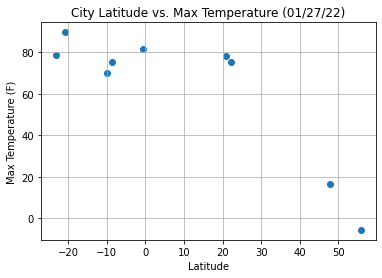

In [42]:
# Build a scatter plot for latitude vs. temperature 
plt.scatter(weather_df['Latitude'], weather_df['Max Temp'], marker="o")

# Label axes and title and format time
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

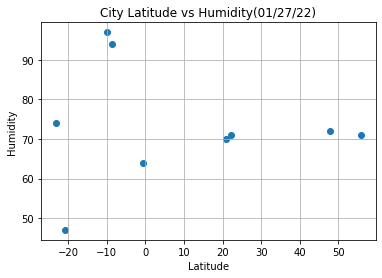

In [41]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

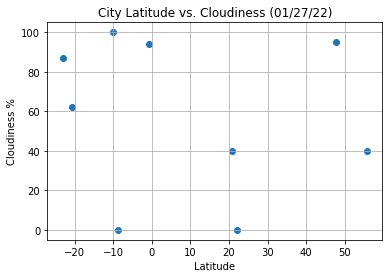

In [40]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

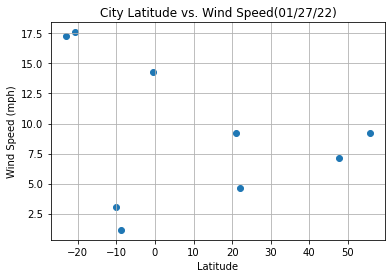

In [44]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

In [24]:
# Split the data into Northern (lat >==0) and Southern Hemispheres (lat < 0)

northern_df = weather_df.loc[(weather_df["Latitude"]>=0)]
southern_df = weather_df.loc[(weather_df["Latitude"]<0)]


In [ ]:
northern_df.count()

In [ ]:
southern_df.count()

In [ ]:
# Define the linear regression function along with the scatter plot for each graph

def line_regr(x_values, y_values, yaxis):

    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    correlation = st.pearsonr(x_values, y_values)

    # Scatter Plots    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, color = "red")
    plt.xlabel('Latitude')
    plt.ylabel(yaxis)
    plt.annotate(line_eq)
    print(f"The correlation coefficient is {round(correlation[0],2)}")
    plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


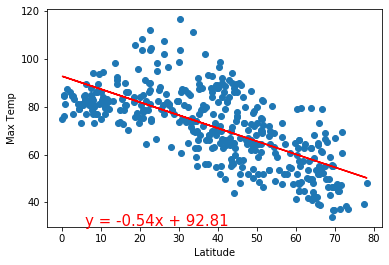

In [25]:
# Call regression function for Northern Hemisphere - max temp vs. latitude

x_values = northern_df['Latitude']
y_values = northern_df['Max Temp']
line_regr(x,y,'Max Temperature (F)')

#plt.savefig("NH_temp_vs_lat.png")

#print(f"The regression equation is {line_eq}")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


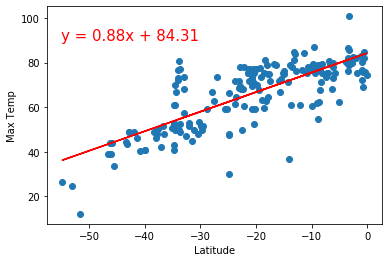

In [26]:
# Call regression function for Southern Hemisphere - max temp vs. latitude

x_values = southern_df['Latitude']
y_values = southern_df['Max Temp']
line_regr(x,y,'Max Temperature (F)')

#plt.savefig("SH_temp_vs_lat.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


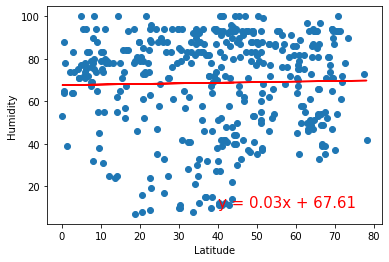

In [27]:
# Call regression function for Northern Hemisphere - humidity vs. latitude

x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
line_regr(x,y,'Humidity %')

#plt.savefig("NH_humidity_vs_lat.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


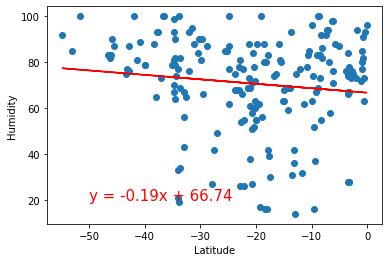

In [28]:
# Call regression function for Southern Hemisphere - humidity vs. latitude

x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
line_regr(x,y,'Humidity %')

#plt.savefig("SH_humidity_vs_lat.png")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


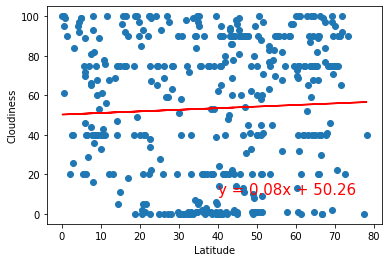

In [29]:
# Call regression function for Northern Hemisphere - cloudiness vs. latitude

x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
line_regr(x,y,'Cloudiness')

#plt.savefig("NH_clouds_vs_lat.png")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


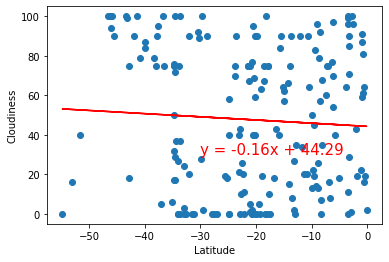

In [30]:
# Call regression function for Southern Hemisphere - cloudiness vs. latitude

x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
line_regr(x,y,'Cloudiness')

#plt.savefig("SH_clouds_vs_lat.png")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


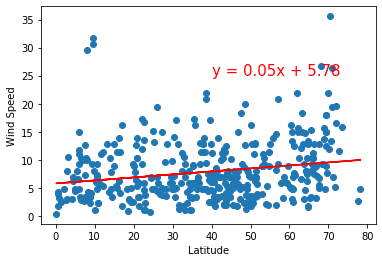

In [31]:
# Call regression function for Northern Hemisphere - wind speed vs. latitude

x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed']
line_regr(x,y,'Wind Speed')

#plt.savefig("NH_windspeed_vs_lat.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


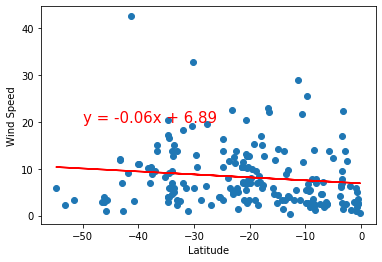

In [32]:
# Call regression function for Southern Hemisphere - wind speed vs. latitude

x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed']
line_regr(x,y,'Wind Speed')

#plt.savefig("SH_windspeed_vs_lat.png")
